In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### There are no missing values as such

In [14]:
data['region'].value_counts().sort_values()

northeast    324
northwest    325
southwest    325
southeast    364
Name: region, dtype: int64

In [15]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

### Converting categorical features into Numerical

In [16]:
clean_data = {'sex': {'male':0, 'female':1},
              'smoker': {'no':0, 'yes':1},
              'region': {'northwest':0, 'northeast':1, 'southeast':2, 'southwest':3}
             }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

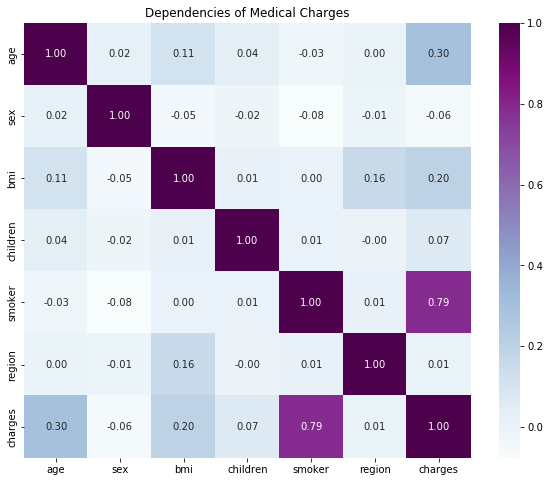

In [19]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges

Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation



In [20]:
print(data['sex'].value_counts().sort_values())
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
northwest    325
southwest    325
southeast    364
Name: region, dtype: int64


### Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA


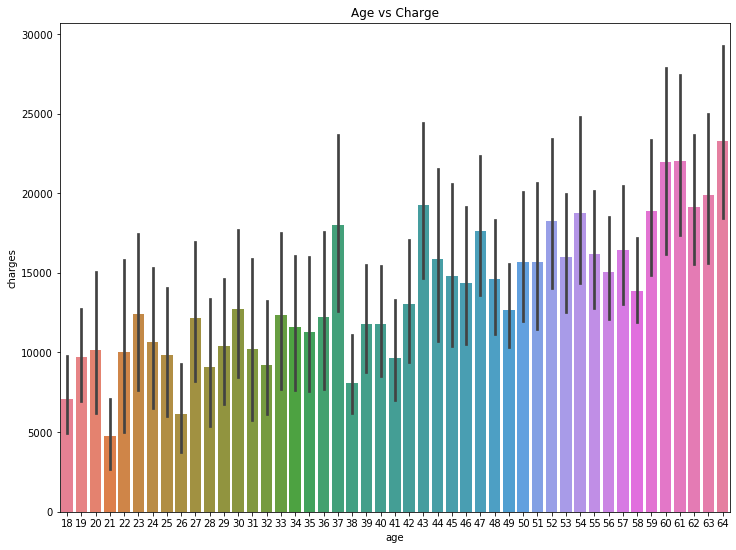

In [21]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')
plt.savefig('./sampleImages/AgevsCharges')

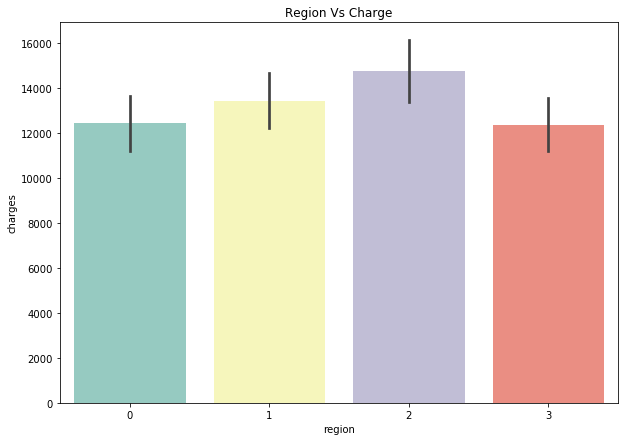

In [25]:
plt.figure(figsize=(10,7))
plt.title('Region Vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3');

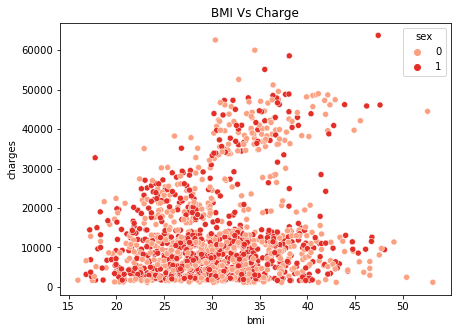

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI Vs Charge');

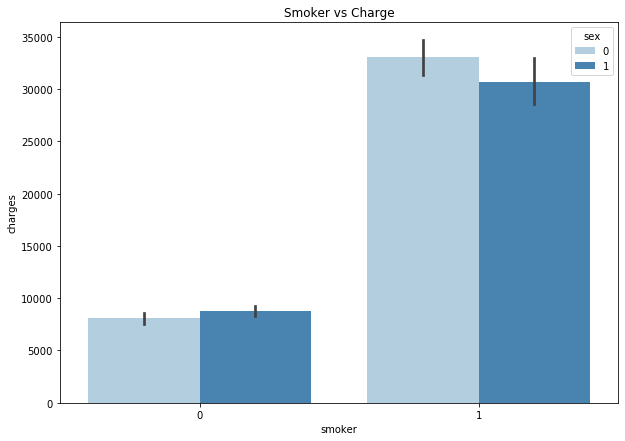

In [27]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex');

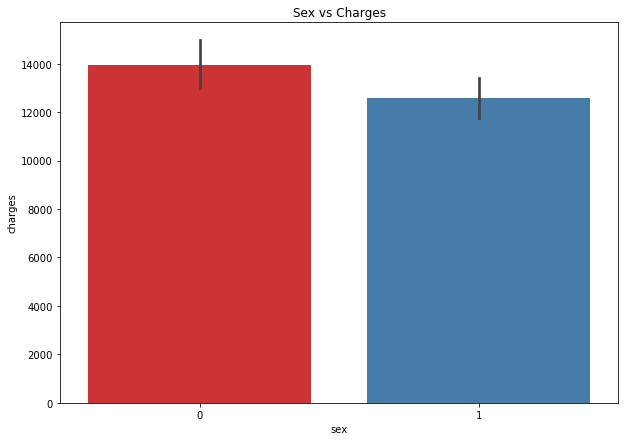

In [28]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1');

### Plotting Skew and Kurtosis

In [29]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print(f'{col} : Skewness {data_copy[col].skew()} and Kurtosis {data_copy[col].kurt()}')

Printing Skewness and Kurtosis for all columns

age : Skewness 0.05567251565299186 and Kurtosis -1.2450876526418673
sex : Skewness 0.02095139743334522 and Kurtosis -2.002556636499175
bmi : Skewness 0.2840471105987448 and Kurtosis -0.05073153135467834
children : Skewness 0.9383804401702414 and Kurtosis 0.2024541467168901
smoker : Skewness 1.4647661601953743 and Kurtosis 0.1457555390520402
region : Skewness -0.03785256698021875 and Kurtosis -1.3293589654583402
charges : Skewness 1.5158796580240388 and Kurtosis 1.6062986532967907


C:\Users\Vishal\Desktop\MedicalInsuranceCostPrediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

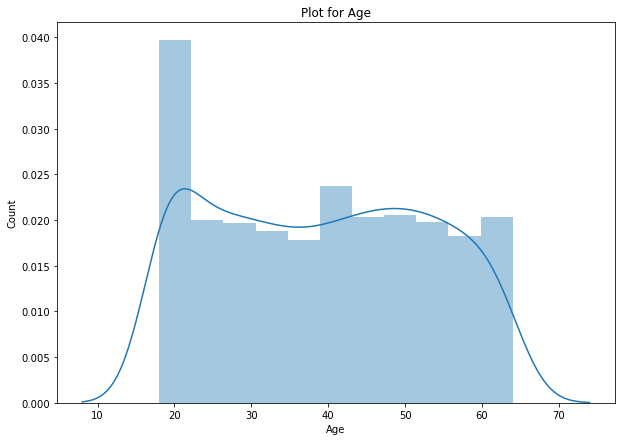

In [30]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\Vishal\Desktop\MedicalInsuranceCostPrediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

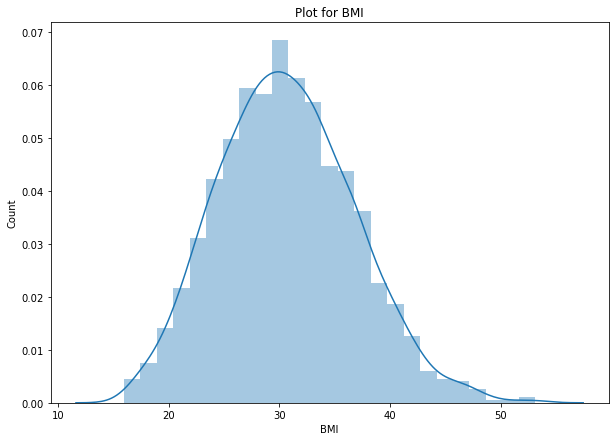

In [32]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

C:\Users\Vishal\Desktop\MedicalInsuranceCostPrediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

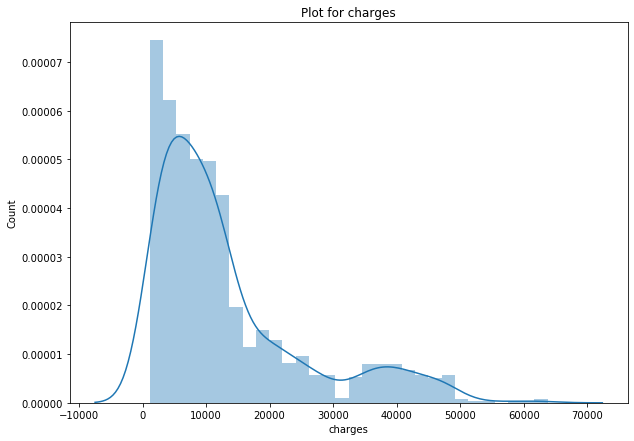

In [33]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

### There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very less actually!

### Prepating data - We can scale BMI and Charges Column before proceeding with Prediction


In [38]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1, 1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [39]:
X = data_pre.drop('charges', axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


### Importing Libraries

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV